##### Instructions
- Keep the original structure, you may add additional code cells and/or mark-down cells for clarity, legibility and/or structure.
- Add the required descriptions, explanations, justifications to the mark-down cells. You can find more mark-down tips & tricks online, for example [here](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) and [here](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet)

# EXAM03: Data Science Group Assignment - Iteration 1

**Group name:** Timo & Jakub

**Student names & numbers:**
* Timo Storny - 00099699
* Jakub Holik - [Student no.]
* [Name 3] - [Student no.]


---

## 0. Iteration setup

**Import libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Load dataset(s)**

In [57]:
df = pd.read_csv("ship_inventory.csv", sep=',')

---

## 1. Business Understanding
*Rubric: LO 6.4D (Reflection on Process)*

**Situation description**

Nebula Brokerage currently prices spaceships using "gut feeling" and rough averages. This is risky, because the inventory prices are highly spread and include extreme outliers, which makes the average inaccurate. Also with this much price variation, it becomes more diffcult to consistently price incoming ships and it may lead to underpricing rare ships (lost profit) or overpricing common ships (low sales and sitting inventory).

**Business objective(s)**

Nebula Brokerage needs a data-driven baseline price that can be used as a standard reference for incoming ships, before building complex AI models. This baseline should:
 - Provide a consistent starting point for pricing decisions.
 - Provide a statistically derived benchmark that will minimize average error

**Data mining goal(s)**

We are going to use naive regression models (mean and median) to determine the best baseline price without knowing anything about the incoming ships. This should minimize the Mean Absolute Error (MAE) and Root Mean Squared Error (EMSE). 

**Success criteria**

We successfully deliver a single baseline reference price for incoming ships that:
- Is derived from the dataset
- Minimizes prediction error without any incoming ship details:
  - Use median as the baseline if optimizing MAE
  - Use mean as the basline if optimizing RMSE
- Includes benchmark performance numbers (MAE and RMSE), so future models can be compared against it

---

## 2. Data Understanding
*Rubric: LO 7.3Q (Visuals) & LO 6.4C (Process)*

**Data exploration**

*Include summary statistics and descriptions of data types below. Describe your findings.*

In [39]:
mean = df['Galactic_Credits'].mean()
median = df['Galactic_Credits'].median()
stdev = df['Galactic_Credits'].std()
mode = df['Galactic_Credits'].mode()[0] # series so take first value only

print(f"Mean: {mean:.2f} \nMedian: {median:.2f} \nStandard deviation: {stdev:.2f} \nMode: {mode}")

## Get total outliers

q1 = df["Galactic_Credits"].quantile(0.25)
q3 = df["Galactic_Credits"].quantile(0.75)
iqr = q3 - q1

outliers_above = df[df["Galactic_Credits"] > q3 + 1.5 * iqr]
outliers_below = df[df["Galactic_Credits"] < q1 - 1.5 * iqr]


print(f"Q1: {q1} \nQ3: {q3} \nInterquartile range: {iqr}")
print(f"Total outlier: {len(outliers_above) + len(outliers_below)}")

Mean: 19453.54 
Median: 15990.00 
Standard deviation: 15540.47 
Mode: 6995
Q1: 7950.0 
Q3: 27990.0 
Interquartile range: 20040.0
Total outlier: 7253


## Interpretation
Given that the mean (19453.54) is significantly greater than the median (15990.00), it suggests that the distribution is skewed to the right
Essentially, some very high values are pulling the average upwards. By looking at the mode, we can further confirm this theory as the mode (6995) 
is significantly lower than both the mean and median, sugesting most of data is observed at the lower end, but with many (7253) major outliers (see box-plot). Lastly, the large standard deviation also suggests large variability (a big spread).

**Visualizations and patterns**

*Discover patterns in the data by creating visualizations. Create at least a histogram of Galactic_Credits. Describe your observations.*

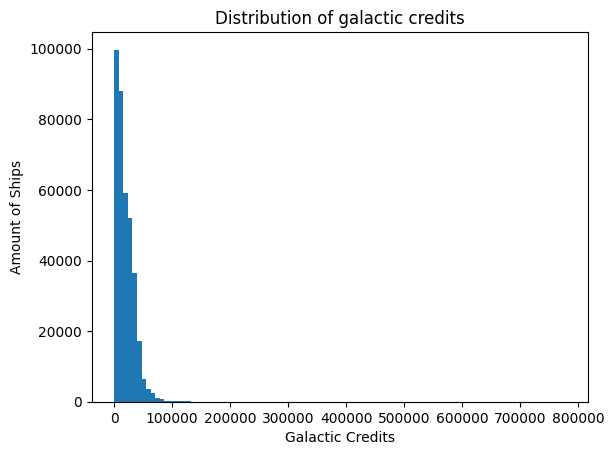

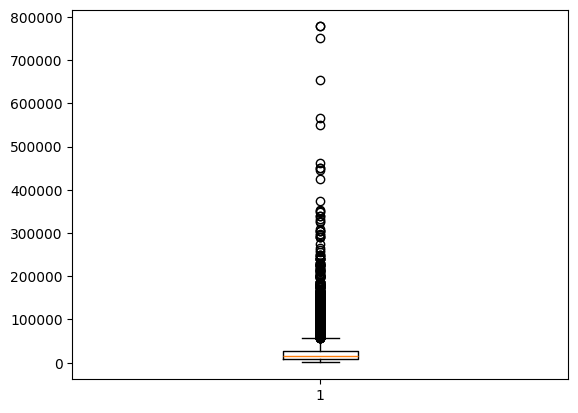

In [64]:
df = df.drop_duplicates()

plt.hist(x=df['Galactic_Credits'], bins=100)
plt.title("Distribution of galactic credits")
plt.xlabel("Galactic Credits")
plt.ylabel("Amount of Ships")
plt.show()
plt.boxplot(df['Galactic_Credits'])
plt.show()

In [65]:
# print(len(df[(df["Galactic_Credits"] < q3) & (df["Galactic_Credits"] > q1) ]))

duplicated_rows = df.duplicated().sum()
print(f"Total duplicated rows: {duplicated_rows}")

duplicated_rows_percent = (duplicated_rows / len(df)) * 100 
print(f"Duplicated row percentage: {duplicated_rows_percent:.2f}%")
# Result before dropping duplicates:
#Total duplicated rows: 500
#Duplicated row percentage: 0.14%

Total duplicated rows: 0
Duplicated row percentage: 0.00%


**Data insights and data quality**
* **Insights:** What are the key trends? What does the distribution look like? What does that mean? 
* **Quality issues:** Document missing values, duplicates, outliers, etc.

**KEY:**
GC -> Galactic Credits

### Data insights and data quality

The histogram shows us that the vast majority of the ship prices fall within the 0-100,000 GC, with some major outliers outliers all the way up to 800,000 GC. These outliers shift the mean ship price upwards significantly. Inspecting the box plot, shows us a visualization of the previously calculated 7253 outliers. Majority of them are densely between approximately 80,000 GC and 300,000 GC. 
From a distribution stand-point, the ship prices and heavily positively skewed. 

Data quality:
Given that that total duplicated rows are 500, or 0.14% of the entire data set, we believe it is fair to assume that these duplicated rows have a neglible impact on the data, however we still decided to drop these duplicates as each ship should ideally only be in there once.
The extreme outliers could be legitimate ships, however they could also represent incorrect measurements/scaling (unit mismatch) or simply data entries errors (human error)

---

## 3. Data Preparation
*Rubric: LO 6.4C (Data Science Steps)*

**Cleaning and preprocessing**
*Describe and justify steps taken (e.g., imputation, handling outliers, fixing other errors).*

In [52]:
# CODE CELL: Data cleaning and preprocessing steps

**Adjusting dataset (optional)**
*If you adjusted the dataset for modeling in additional ways, describe that here*

In [53]:
# OPTIONAL CODE CELL: Additional preprocessing steps

---

## 4. Modeling
*Rubric: LO 6.4C (Data Science Steps)*

**Model setup**
*Describe and justify the creation of your simple benchmark model to predict Galactic_Credits*

In [54]:
# CODE CELL: Model training and setup code

**Testing and performance**
*Describe how you tested the model and interpret the metrics. Make sure to present the metrics in a clear overview.*

In [55]:
# CODE CELL: Model evaluation code

---

## 5. Evaluation
*Rubric: LO 6.4C (Results vs. Objectives)*

**Assessment against succes criteria** 
*What is the difference between the metrics? What does this mean? Did you meet the goals set in the Business Understanding?*

**Key findings and limitations**
*What did you learn? What are the limitations of this current model?*

---

## 6 Personal Contribution
*Rubric: LO 7.3P (Equal Contribution)*

| Student name | Contribution | Personal lessons learned |
| :--- | :--- | :--- |
| Student name 1 | *Contribution description* | *Personal lessons learned this iteration* |
| Student name 2 | *Contribution description* | *Personal lessons learned this iteration* |
| Student name 3 | *Contribution description* | *Personal lessons learned this iteration* |